# 2-1. Multivariate Linear Regression and Gradient Descent

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. Loading the Data

The file Data/housing_prices.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

We load the data.

In [2]:
data = np.loadtxt(os.path.join('Data', 'housing_prices.txt'), delimiter=',')
Org_X = data[:, :2]
y = data[:, 2]
m = y.size

The following is the first 10 rows of the data. The symbols which are used in string format are explained in Appendix.

In [3]:
print('{:>30s}{:>30s}{:>20s}'.format('The size of the house', 'The number of bedrooms', 'The price'))
print('')
for i in range(10):
    print('{:20.0f}{:30.0f}{:30.0f}'.format(Org_X[i, 0], Org_X[i, 1], y[i]))

         The size of the house        The number of bedrooms           The price

                2104                             3                        399900
                1600                             3                        329900
                2400                             3                        369000
                1416                             2                        232000
                3000                             4                        539900
                1985                             4                        299900
                1534                             3                        314900
                1427                             3                        198999
                1380                             3                        212000
                1494                             3                        242500


### 2. Normalization

As you can see, the ranges of first two columns are very different. So if we find the minimal point $\theta$ which minimizes the cost function $J(\theta)$, it would be hard to find a proper constant $\alpha$ such that $J(\theta)$ converges because $J(\theta)$ does not have much convexity. (The formulas for the cost function and gradient descent can be found in Section 4 and Section 5, respectively.) To avoid from this situation, we first scale the data. We can consider standardization, min-max normalization or mean normalization. 

(1) If we scale the data with standardization, then the mean and the standard deviation of the resulting data would be zero and one, respectively.

(2) If we scale the data with min-max normalization, then the range of the resulting data would be [0, 1].

(3) If we scale the data with mean normalization, then the range of the resulting data would be [-1, 1].

For details, see https://github.com/Sieye-R/Machine_Learning/blob/main/Normalization.pdf

### (1) Standardization

We standardize the data. Suppose that $X$ has $2$ features $X^{(1)}$ and $X^{(2)}$ and $m$ training sets. If $\mu^{(i)}$ and $\sigma^{(i)}$ are the mean and the standard deviation of the feature $X^{(i)}$, respectively, then we replace $x_j^{(i)}$ with 
$$\frac{x_j^{(i)}-\mu^{(i)}}{\sigma^{(i)}}$$
for each $i = 1, 2$ and $j=1, \cdots, m$.

In [4]:
def Standardization(X):
    X_stand = Org_X.copy()
    mu = np.mean(Org_X, axis=0)
    sigma = np.std(Org_X, axis=0)
    X_stand = (Org_X - mu)/sigma
    return X_stand

The following is the first 10 rows of the data after standardization.

In [5]:
print('{:>30s}{:>30s}{:>20s}'.format('The size of the house', 'The number of bedrooms', 'The price'))
print('')
for i in range(10):
    print('{:20.4f}{:30.4f}{:30.4f}'.format(Standardization(Org_X)[i, 0], Standardization(Org_X)[i, 1], y[i]))

         The size of the house        The number of bedrooms           The price

              0.1314                       -0.2261                   399900.0000
             -0.5096                       -0.2261                   329900.0000
              0.5079                       -0.2261                   369000.0000
             -0.7437                       -1.5544                   232000.0000
              1.2711                        1.1022                   539900.0000
             -0.0199                        1.1022                   299900.0000
             -0.5936                       -0.2261                   314900.0000
             -0.7297                       -0.2261                   198999.0000
             -0.7895                       -0.2261                   212000.0000
             -0.6445                       -0.2261                   242500.0000


We can also standardize the data with Scikitlearn as follows:

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Org_X)
print('{:>30s}{:>30s}{:>20s}'.format('The size of the house', 'The number of bedrooms', 'The price'))
print('')
for i in range(10):
    print('{:20.4f}{:30.4f}{:30.0f}'.format(scaler.transform(Org_X)[i, 0], scaler.transform(Org_X)[i, 1], y[i]))

         The size of the house        The number of bedrooms           The price

              0.1314                       -0.2261                        399900
             -0.5096                       -0.2261                        329900
              0.5079                       -0.2261                        369000
             -0.7437                       -1.5544                        232000
              1.2711                        1.1022                        539900
             -0.0199                        1.1022                        299900
             -0.5936                       -0.2261                        314900
             -0.7297                       -0.2261                        198999
             -0.7895                       -0.2261                        212000
             -0.6445                       -0.2261                        242500


### (2) Min-Max Normalization

Suppose that $X$ has $2$ features $X^{(1)}$ and $X^{(2)}$ and $m$ training sets. If $m^{(i)}$ and $M^{(i)}$ are the minimum and the maximum of the feature $X^{(i)}$, respectively, then we replace $x_j^{(i)}$ with 
$$\frac{x_j^{(i)}-m^{(i)}}{M^{(i)}-m^{(i)}}$$
for each $i = 1, 2$ and $j=1, \cdots, m$.

In [7]:
def Min_Max(X):
    Max = np.max(Org_X, axis=0)
    Min = np.min(Org_X, axis=0)
    X_mm = (Org_X - Min)/(Max-Min)
    return X_mm

The following is the first 10 rows after min_max normalization.

In [8]:
print('{:>30s}{:>30s}{:>20s}'.format('The size of the house', 'The number of bedrooms', 'The price'))
print('')
for i in range(10):
    print('{:20.4f}{:30.4f}{:30.0f}'.format(Min_Max(Org_X)[i, 0], Min_Max(Org_X)[i, 1], y[i]))

         The size of the house        The number of bedrooms           The price

              0.3453                        0.5000                        399900
              0.2063                        0.5000                        329900
              0.4269                        0.5000                        369000
              0.1555                        0.2500                        232000
              0.5924                        0.7500                        539900
              0.3125                        0.7500                        299900
              0.1881                        0.5000                        314900
              0.1586                        0.5000                        198999
              0.1456                        0.5000                        212000
              0.1771                        0.5000                        242500


### (3) Mean Normalization

Suppose that $X$ has $2$ features $X^{(1)}$ and $X^{(2)}$ and $m$ training sets. If $\mu^{(i)}$, $m^{(i)}$ and $M^{(i)}$ are the mean, minimum and the maximum of the feature $X^{(i)}$, respectively, then we replace $x_j^{(i)}$ with 
$$\frac{x_j^{(i)}-\mu^{(i)}}{M^{(i)}-m^{(i)}}$$
for each $i = 1, 2$ and $j=1, \cdots, m$.

In [9]:
def MeanNormalization(X):
    X_MeanNorm = Org_X.copy()
    mu = np.mean(Org_X, axis=0)
    Max = np.max(Org_X, axis=0)
    Min = np.min(Org_X, axis=0)
    X_MeanNorm = (Org_X - mu)/(Max-Min)
    return X_MeanNorm

The following is the first 10 rows after mean normalization.

In [10]:
print('{:>30s}{:>30s}{:>20s}'.format('The size of the house', 'The number of bedrooms', 'The price'))
print('')
for i in range(10):
    print('{:20.4f}{:30.4f}{:30.0f}'.format(MeanNormalization(Org_X)[i, 0], MeanNormalization(Org_X)[i, 1], y[i]))

         The size of the house        The number of bedrooms           The price

              0.0285                       -0.0426                        399900
             -0.1105                       -0.0426                        329900
              0.1101                       -0.0426                        369000
             -0.1612                       -0.2926                        232000
              0.2756                        0.2074                        539900
             -0.0043                        0.2074                        299900
             -0.1287                       -0.0426                        314900
             -0.1582                       -0.0426                        198999
             -0.1712                       -0.0426                        212000
             -0.1397                       -0.0426                        242500


In this notebook, we will normalize the data by mean normalization. 

### 3. Modification of x (add a column of 1's for the intercept term)

Suppose that we have $n$ features $X^{(1)}, \cdots, X^{(n)}$ and each feature $X^{(j)}$ has $m$ training datasets
consisting of independent variables $x_1^{(j)}, \cdots, x_m^{(j)}$ and that dependent variables are $y_1, \cdots, y_m$.
Then the linear regression predictor of the data is of the form
$$y = \theta_0 + \theta_1 x^{(1)} + \theta_2 x^{(2)} + \cdots + \theta_n x^{(n)}.$$ 

We define the $m \times (n+1)$ matrix $X$ by
$$X(i, 1) = 1 \qquad X(i, j+1) = x_i^{(j)} \qquad (i = 1, \cdots, m, \; j=1, \cdots n).$$
We also define the column vectors $y \in \mathbb{R}^m$ and $\theta \in \mathbb{R}^{n+1}$ by
$$y(i) = y_i \qquad (1 \leq i \leq m)$$
and
$$\theta(i) = \theta_{i-1} \qquad (i=1, \cdots, n+1).$$

Then the formula of the least square is given by
$$\sum_{i=1}^m \, \{(X \theta-y)(i)\}^2.$$

In the following cell, we add a column of 1's and construct an $m \times (n+1)$ matrix $X$.

In [11]:
X = np.concatenate([np.ones((m, 1)), MeanNormalization(Org_X)], axis=1)

### 4. Cost Function

The cost function $J(\theta_0, \theta_1, \cdots, \theta_n)$ is defined by
$$J(\theta_0, \theta_1, \cdots, \theta_n) = \frac{1}{2m} \sum_{i=1}^m \, \{(X \theta-y)(i)\}^2.$$
This value is the mean of least squares devided by $2$.
When we partial differentiate $J$, $2$ is eliminated by the chain rule.
Except this, $2$ does not play any role when we partial differentiate $J$.

We implement the cost function $J(\theta_0, \theta_1, \cdots, \theta_n)$ with Python. Here, we confusingly use $\theta$ whose shape is (3, ) in our Python language.

In [12]:
def computeCostMulti(X, y, theta):
    m = y.shape[0] 
    J = 0
    dot_prod=np.dot(X, theta)
    J = np.dot(dot_prod-y, dot_prod-y)
    J /= 2*m
    return J

The following is the cost of $(\theta_0, \theta_1, \theta_2)=(0,0,0)$.

In [13]:
J = computeCostMulti(X, y, theta=np.array([0.0, 0.0, 0.0]))
print('J(0, 0) = %.2f' % J)

J(0, 0) = 65591548106.46


### 5. Gradient Descent


We set
$$\theta_j^{(0)} = \theta_j \qquad (j = 0, 1, 2)$$
and
$$\theta_j^{(r)} = \theta_j^{(r-1)} - \alpha \frac{\partial J}{\partial \theta_j}(\theta_0^{(r-1)}, \theta_1^{(r-1)}, \theta_2^{(r-1)}) \qquad (r=1, 2, \cdots).$$
For sutible $\alpha$, 
the sequence $g(\alpha) = \{(\theta_0^{(r)}, \theta_1^{(r)}, \theta_2^{(r)})\}$ converges to the minimum point of $J(\theta_0, \theta_1, \theta_2)$ as $r$ goes to the infinity. 

The direct computation shows that
$$\frac{\partial J}{\partial \theta_j}(\theta_0, \theta_1, \theta_2) = \frac{1}{m} \sum_{i=1}^m \, (X\theta - y)(i)X_i^{(j)} \qquad (j=0, 1, 2)$$

We implement gradient descent with Python.

In [14]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = y.shape[0] 
    theta = theta.copy()
    J_history = []
    
    for i in range(iterations):
        dotprod = np.dot(X, theta)
        theta = theta - (alpha / m) * np.dot(dotprod-y, X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

The following graph shows that $g(\alpha)$ converges when $\alpha=0.1$.

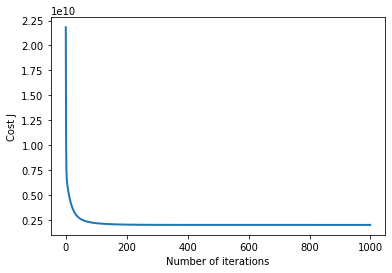

In [15]:
alpha = 0.5
iterations = 1000

theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, iterations)

plt.plot(np.arange(len(J_history)), J_history, lw=2) #lw = linewidth
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

The outputs of the following two cells show that what the minimum point $\theta$ of $J$ is.

In [16]:
alpha = 0.5
iterations = 2000
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, iterations)
print(theta)

[340412.65957447 504777.89981689 -34952.0710886 ]


In [17]:
alpha = 0.5
iterations = 3000
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, iterations)
print(theta)

[340412.65957447 504777.90398732 -34952.07644855]


### 6. Linear Regression Predictor

In [18]:
print('Hence, the linear regression predictor is y = {:.4f} + {:.4f} x^(1) + {:.4f} x^(2).'.format(*theta))

Hence, the linear regression predictor is y = 340412.6596 + 504777.9040 x^(1) + -34952.0764 x^(2).


Now, we predict the price of the house whose size is 1650 square feet with 3 bedrooms. 
We need to apply for the same normalization to $[1650, 3]$.

In [19]:
house = np.array([1650, 3])
mu = np.mean(Org_X, axis=0)
Max = np.max(Org_X, axis=0)
Min = np.min(Org_X, axis=0)
house_mean_normalization = (house - mu)/(Max-Min)
house_final = X = np.concatenate([np.ones(1), house_mean_normalization])

In [20]:
predict = house_final @ theta
print('1650 square feet and three bedrooms house \n the predicted price by gradient descent is ${:.0f}'.format(predict))

1650 square feet and three bedrooms house 
 the predicted price by gradient descent is $293081


### 7. Gradient Descent without Normalization

In this section, we plot the graph of $J(\theta)$ when $\alpha=0.001$ without normalization. We can compare the result with the 15-th cell. We chose 0.5 for $\alpha$ in the 15-th cell.

In [21]:
X = np.concatenate([np.ones((m, 1)), Org_X], axis=1)

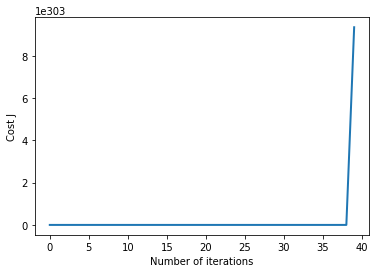

In [22]:
alpha = 0.001
iterations = 50

theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, iterations)

plt.plot(np.arange(len(J_history)), J_history, lw=2) #lw = linewidth
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

### 8. Normal Equations

In Section 3 of <a href="https://github.com/Sieye-R/Machine_Learning/blob/main/Linear%20Regression%20and%20Polynomial%20Regression.pdf">Linear Regression and Polynomial Regression.pdf</a>, 
it is proved that $\theta$ can be expressed in terms of matrices $X$ and $y$ as follows:
$$\theta = (X^{\textsf{T}}X)^{-1}X^{\textsf{T}}y.$$
When we directly calculate the minimal point of the cost function $J(\theta)$, we do not need to normaliza the data. The cost function is convex so it has the minimum. How convex the graph of $J$ is does not matter.

In [23]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    for1 = np.dot(X.T, X)
    for2 = np.linalg.inv(for1)
    for3 = np.dot(X.T, y)
    theta = np.dot(for2, for3)
    return theta

In [24]:
theta = normalEqn(X, y)
print('Theta computed from the normal equations: {:s}'.format(str(theta)))

Theta computed from the normal equations: [89597.9095428    139.21067402 -8738.01911233]


In [25]:
theta

array([89597.9095428 ,   139.21067402, -8738.01911233])

In [26]:
X_array = [1, 1650, 3]
price = np.dot(X_array, theta)
print('1650 square feet and three bedrooms house \n the predicted price by gradient descent is ${:.0f}'.format(price))

1650 square feet and three bedrooms house 
 the predicted price by gradient descent is $293081
